<a href="https://colab.research.google.com/github/sanjana3014/bitcoin_price_predictor/blob/main/Bitcoin_Price_Prediction_by_Sanjana_Deshpande.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: Dual Moving average crossover

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving bitcoin_data.csv to bitcoin_data (1).csv


In [ ]:
bitcoin = pd.read_csv('bitcoin_data.csv')
#Display the data
bitcoin


,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,1/1/17 0:00,966.34,1005.00,960.53,997.75,6850.59,6.764742e+06,987.47
1,1/2/17 0:00,997.75,1032.00,990.01,1012.54,8167.38,8.273577e+06,1013.00
2,1/3/17 0:00,1011.44,1039.00,999.99,1035.24,9089.66,9.276500e+06,1020.56
3,1/4/17 0:00,1035.51,1139.89,1028.56,1114.92,21562.46,2.346964e+07,1088.45
4,1/5/17 0:00,1114.38,1136.72,885.41,1004.74,36018.86,3.621140e+07,1005.35
...,...,...,...,...,...,...,...,...
447,3/24/18 0:00,8917.99,9020.00,8505.00,8547.00,9731.98,8.581162e+07,8817.49
448,3/25/18 0:00,8541.96,8680.00,8368.63,8453.90,9155.91,7.801322e+07,8520.53
449,3/26/18 0:00,8451.12,8500.00,7831.15,8149.66,17693.42,1.452465e+08,8209.07
450,3/27/18 0:00,8152.26,8211.62,7742.11,7791.70,12385.25,9.848842e+07,7952.07


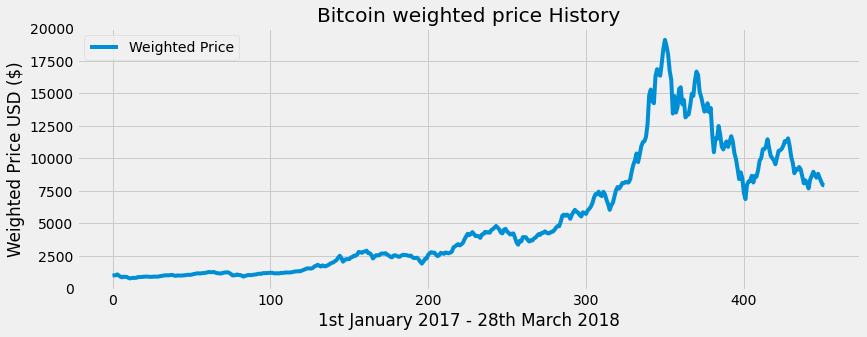

In [ ]:
#Visualizing the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(bitcoin['Weighted Price'], label= 'Weighted Price')
plt.title('Bitcoin weighted price History')
plt.xlabel('1st January 2017 - 28th March 2018')
plt.ylabel('Weighted Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Creation of simple moving average with a 21 day window
SMA21 = pd.DataFrame()
SMA21['Weighted Price'] = bitcoin['Weighted Price'].rolling(window = 21).mean()
SMA21

,Weighted Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
447,9144.367619
448,9012.965238
449,8854.332857
450,8711.037619


In [ ]:
#Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Weighted Price'] = bitcoin['Weighted Price'].rolling(window=100).mean()
SMA100

,Weighted Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
447,11513.4931
448,11425.3484
449,11323.1322
450,11211.5505


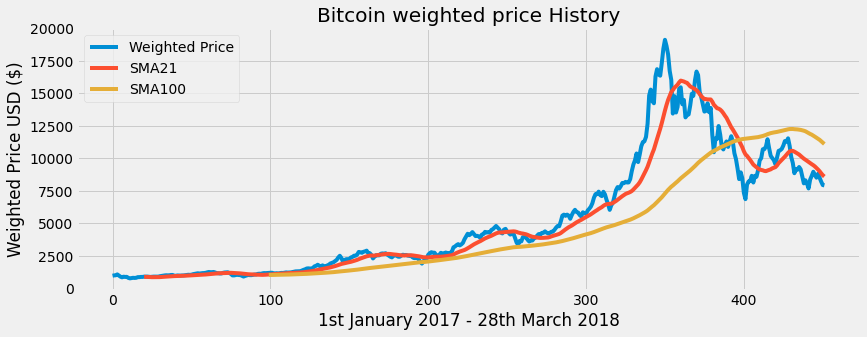

In [ ]:
#Visualizing the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(bitcoin['Weighted Price'], label= 'Weighted Price')
plt.plot(SMA21['Weighted Price'], label = 'SMA21')
plt.plot(SMA100['Weighted Price'], label = 'SMA100')
plt.title('Bitcoin weighted price History')
plt.xlabel('1st January 2017 - 28th March 2018')
plt.ylabel('Weighted Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['bitcoin'] = bitcoin['Weighted Price']
data['SMA21'] = SMA21['Weighted Price']
data['SMA100']= SMA100['Weighted Price']
data

,bitcoin,SMA21,SMA100
0,987.47,NaN,NaN
1,1013.00,NaN,NaN
2,1020.56,NaN,NaN
3,1088.45,NaN,NaN
4,1005.35,NaN,NaN
...,...,...,...
447,8817.49,9144.367619,11513.4931
448,8520.53,9012.965238,11425.3484
449,8209.07,8854.332857,11323.1322
450,7952.07,8711.037619,11211.5505


In [ ]:
#Create function of buy & sell
def buy_sell(data):
  sigPriceBuy = []
  sigPricesell= []
  flag = -1
  for i in range(len(data)):
    if data['SMA21'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['bitcoin'][i])
        sigPricesell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    elif data['SMA21'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(data['bitcoin'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPricesell.append(np.nan)

  return (sigPriceBuy, sigPricesell)


In [ ]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
#Show the data
data

,bitcoin,SMA21,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,987.47,NaN,NaN,NaN,NaN
1,1013.00,NaN,NaN,NaN,NaN
2,1020.56,NaN,NaN,NaN,NaN
3,1088.45,NaN,NaN,NaN,NaN
4,1005.35,NaN,NaN,NaN,NaN
...,...,...,...,...,...
447,8817.49,9144.367619,11513.4931,NaN,NaN
448,8520.53,9012.965238,11425.3484,NaN,NaN
449,8209.07,8854.332857,11323.1322,NaN,NaN
450,7952.07,8711.037619,11211.5505,NaN,NaN


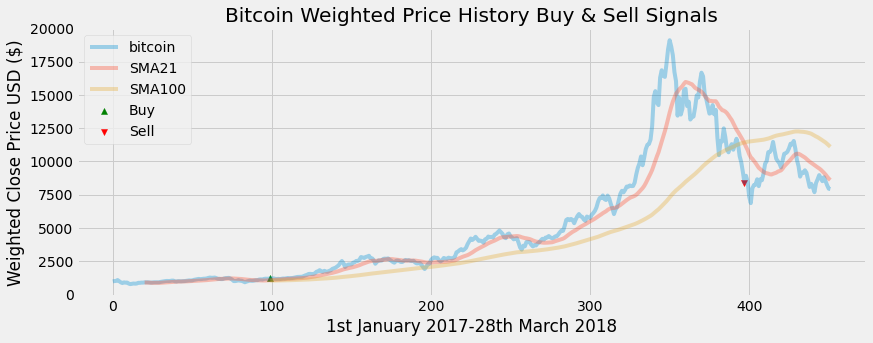

In [ ]:
#Visualize the data & the Strategy
plt.figure(figsize=(12.6,4.6))
plt.plot(data['bitcoin'], label= 'bitcoin', alpha = 0.35)
plt.plot(data['SMA21'], label=  'SMA21', alpha = 0.35)
plt.plot(data['SMA100'], label= 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label= 'Buy', marker= '^', color= 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label= 'Sell', marker= 'v', color= 'red')
plt.title('Bitcoin Weighted Price History Buy & Sell Signals')
plt.xlabel('1st January 2017-28th March 2018')
plt.ylabel('Weighted Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()